# 1. Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# 2. Load the Dataset

In [2]:
path = '/content/housing.csv'
dataset = pd.read_csv(path)
print("Dataset Loaded:\n", dataset.head())

Dataset Loaded:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
print(dataset.shape)

(20640, 10)


In [4]:
print(dataset.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
print(dataset.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


# 3. Preprocess the Dataset

In [6]:
# Check how many missing values
print("Missing values before:\n", dataset['total_bedrooms'].isnull().sum())

# Impute missing values with the median of the column
median_total_bedrooms = dataset['total_bedrooms'].median()
dataset['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Confirm there are no more missing values
print("Missing values after:\n", dataset['total_bedrooms'].isnull().sum())

Missing values before:
 207
Missing values after:
 0


<ipython-input-6-1125541804>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


In [7]:
def preprocess_dataset(dataset, target_columns):

    # Encode categorical variables
    le = LabelEncoder()

    for column in dataset.select_dtypes(include=['object']).columns:
        dataset[column] = le.fit_transform(dataset[column])

    # Split dataset
    X = dataset.drop(columns=target_columns, axis=1)  # Features
    y = dataset[target_columns] # Target
    X = X.to_numpy()
    y = y.to_numpy().reshape(-1, 1)

    sc = MinMaxScaler()
    X = sc.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X, y, X_train, X_test, y_train, y_test

In [8]:
X, y, X_train, X_test, y_train, y_test = preprocess_dataset(dataset, target_columns=['median_house_value'])
print("Data Preprocessing Completed.")

Data Preprocessing Completed.


In [9]:
print(dataset.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object


# 4. Reference Gradient Boosting Regressor

In [12]:
estimators_number = 100

gbr_ref = GradientBoostingRegressor(
    n_estimators=estimators_number,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

start_time = datetime.now()
gbr_ref.fit(X_train, y_train.ravel())
end_time = datetime.now()

y_pred = gbr_ref.predict(X_test)

In [13]:
# Metrics
r2 = r2_score(y_test, y_pred)
execution_time = (end_time - start_time).microseconds

print(f"\nReference Gradient Boosting Regressor with {estimators_number} estimators")
print(f"\nExecution Time: {execution_time} mcs")
print(f"\nR2 score: {r2:.4f}")


Reference Gradient Boosting Regressor with 100 estimators

Execution Time: 585378 mcs

R2 score: 0.7585


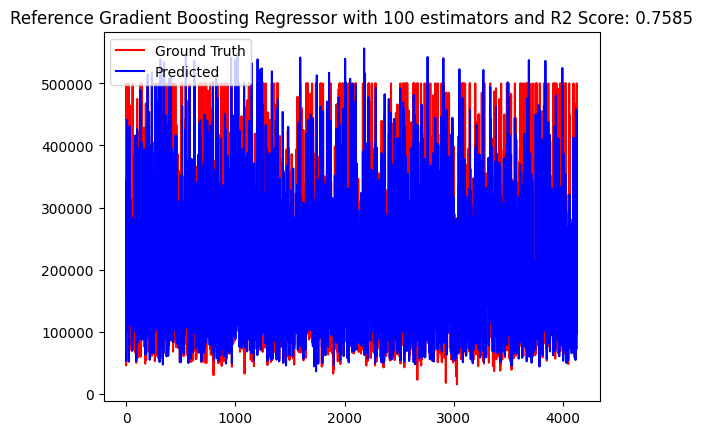

In [14]:
y_pred = gbr_ref.predict(X_test)

plt.plot(y_test, color='red', label='Ground Truth')
plt.plot(y_pred, color='blue', label='Predicted')
plt.legend(loc='upper left')
plt.title(f"Reference Gradient Boosting Regressor with {estimators_number} estimators and R2 Score: {r2:.4f}")
plt.show()

In [15]:
# Cross-Validation
n_folds = 10

cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores_ref = cross_val_score(gbr_ref, X, y, scoring='r2', cv=cv)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

In [18]:
print(f"The mean R2 score for {n_folds} for the Reference Gradient Boosting Regressor with {estimators_number} estimators is: {scores_ref.mean():.4f}")

The mean R2 score for 10 for the Reference Gradient Boosting Regressor with 100 estimators is: 0.7709


# 5. Custom Gradient Boosting Regressor

In [25]:
class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def get_params(self, deep=True):
        return {
            "n_estimators": self.n_estimators,
            "learning_rate": self.learning_rate,
            "max_depth": self.max_depth,
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def fit(self, X, y):
        y = y.ravel()

        # Save initial prediction as the mean of y
        self.initial_prediction = np.mean(y)
        y_pred = np.full_like(y, fill_value=self.initial_prediction, dtype=np.float64)

        for i in range(self.n_estimators):
            # Compute the pseudo-residuals (negative gradient for MSE)
            residuals = y - y_pred

            # Fit a regression tree to residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Update predictions
            update = self.learning_rate * tree.predict(X)
            y_pred += update

            # Save the fitted tree
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), fill_value=self.initial_prediction, dtype=np.float64)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

In [26]:
estimators_number = 100

gbr_cus = CustomGradientBoostingRegressor(
    n_estimators=estimators_number,
    learning_rate=0.1,
    max_depth=3
)

start_time = datetime.now()
gbr_cus.fit(X_train, y_train)
end_time = datetime.now()

y_pred = gbr_cus.predict(X_test)

In [27]:
# Metrics
r2 = r2_score(y_test, y_pred)
execution_time = (end_time - start_time).microseconds

print(f"\nCustom Gradient Boosting Regressor with {estimators_number} estimators")
print(f"\nExecution Time: {execution_time} mcs")
print(f"\nR2 score: {r2:.4f}")


Custom Gradient Boosting Regressor with 100 estimators

Execution Time: 440397 mcs

R2 score: 0.7585


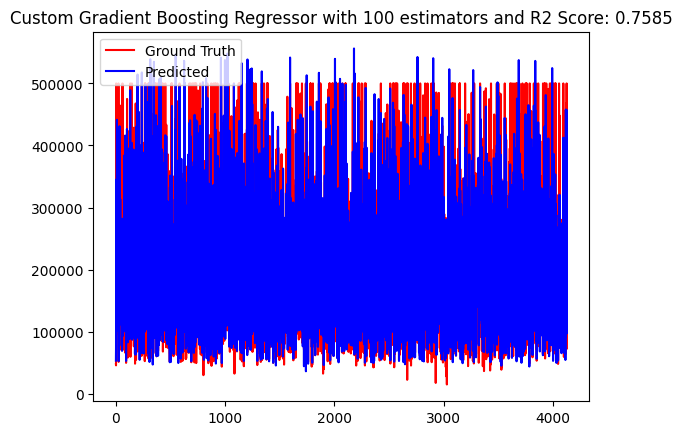

In [28]:
y_pred = gbr_cus.predict(X_test)

plt.plot(y_test, color='red', label='Ground Truth')
plt.plot(y_pred, color='blue', label='Predicted')
plt.legend(loc='upper left')
plt.title(f"Custom Gradient Boosting Regressor with {estimators_number} estimators and R2 Score: {r2:.4f}")
plt.show()

In [29]:
# Cross-Validation
n_folds = 10

cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores_cus = cross_val_score(gbr_cus, X, y, scoring='r2', cv=cv)

In [30]:
print(f"The mean R2 score for {n_folds} for the Custom Gradient Boosting Regressor with {estimators_number} estimators is: {scores_cus.mean():.4f}")

The mean R2 score for 10 for the Custom Gradient Boosting Regressor with 100 estimators is: 0.7708
